In [20]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import Imputer, StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from scipy.stats.mstats import normaltest
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [195]:
# import data and expand column names for presentation visuals
df = pd.read_pickle('final_final_results.pkl')
df = df.rename(index=str, columns={"projection": "espn_projected_ranking", "points": "actual_points_scored"})
df.tail()

,position,espn_projected_ranking,actual_points_scored,Team,No,Exp,Height,Weight,Age,School,School_Championships,Num_of_players_from_school,Depth,2015_points
Will Tye,TE,265,93.5,NYG,45,2,"6'2""",262,24,Stony Brook,0,1,2,62
Willie Snead,WR,97,191.5,NO,83,2,"5'11""",195,23,Ball State,0,1,2,116
Zach Ertz,TE,110,183.6,PHI,86,4,"6'5""",250,25,Stanford,0,5,2,95
Zach Miller,TE,137,119.6,CHI,86,7,"6'5""",243,31,Nebraska Omaha,0,1,1,74
Zach Zenner,RB,242,93.0,DET,34,2,"5'11""",222,24,South Dakota State,0,2,3,7


In [5]:
#find highest projections
df.sort_values(by='espn_projected_ranking',ascending= True)

,position,espn_projected_ranking,actual_points_scored,Team,No,Exp,Height,Weight,Age,School,School_Championships,Num_of_players_from_school,Depth,2015_points
Antonio Brown,WR,1,307.3,PIT,84,7,"5'10""",181,27,Central Michigan,0,2,1,250
Odell Beckham Jr.,WR,2,296.6,NYG,13,3,"5'11""",198,23,LSU,3,6,1,223
Adrian Peterson,RB,3,9.0,MIN,28,10,"6'1""",220,31,Oklahoma,7,6,1,231
Julio Jones,WR,4,259.9,ATL,11,6,"6'3""",220,27,Alabama,11,7,1,235
Todd Gurley,RB,5,198.2,LA,30,2,"6'1""",227,21,Georgia,1,6,1,189
Ezekiel Elliott,RB,6,325.4,DAL,21,0,"6'0""",225,20,Ohio State,6,7,1,0
DeAndre Hopkins,WR,7,197.4,HOU,10,4,"6'1""",215,24,Clemson,2,7,1,220
David Johnson,RB,8,407.8,ARZ,31,2,"6'1""",224,24,Northern Iowa,0,1,1,-1
Devonta Freeman,RB,9,284.1,ATL,24,3,"5'8""",206,24,Florida State,3,7,1,243
A.J. Green,WR,10,186.4,CIN,18,6,"6'4""",210,27,Georgia,1,6,1,188


In [6]:
#find highest actual scorers
df.sort_values(by='actual_points_scored',ascending= False)

,position,espn_projected_ranking,actual_points_scored,Team,No,Exp,Height,Weight,Age,School,School_Championships,Num_of_players_from_school,Depth,2015_points
David Johnson,RB,8,407.8,ARZ,31,2,"6'1""",224,24,Northern Iowa,0,1,1,-1
Aaron Rodgers,QB,49,380.0,GB,12,12,"6'2""",225,32,California,0,7,1,305
Matt Ryan,QB,195,347.5,ATL,2,9,"6'4""",217,31,Boston College,0,1,1,236
Drew Brees,QB,68,332.3,NO,9,16,"6'0""",209,37,Purdue,0,1,1,306
Ezekiel Elliott,RB,6,325.4,DAL,21,0,"6'0""",225,20,Ohio State,6,7,1,0
Le'Veon Bell,RB,12,317.4,PIT,26,4,"6'1""",225,24,Michigan State,2,3,1,87
Andrew Luck,QB,61,307.7,IND,12,5,"6'4""",240,26,Stanford,0,5,1,133
Antonio Brown,WR,1,307.3,PIT,84,7,"5'10""",181,27,Central Michigan,0,2,1,250
Jordy Nelson,WR,17,304.7,GB,87,9,"6'3""",217,31,Kansas State,0,3,1,0
Mike Evans,WR,23,304.1,TB,13,3,"6'5""",231,22,Texas A&M,1,4,1,137


In [196]:
#shorten column names for ease of calculations
df = df.rename(index=str, columns={"espn_projected_ranking": "projection", "actual_points_scored": "points"})

In [197]:
#get regression coefficients and MSE
projection = np.array(df.projection)
points = np.array(df.points)

lr = LinearRegression()
projection = df.projection.values.reshape(-1, 1)
projection = df.projection.values.reshape(-1, 1)
lr.fit(projection, df.points)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [199]:
#make a new column for residuals and sort to show which predictions were the worst
df['lr_predicted_points'] = lr.coef_*df['projection']+lr.intercept_
df['residual'] = df['points'] - df['lr_predicted_points']
df = df.sort_values(by='residual',ascending= False)
df[['projection','points', 'lr_predicted_points', 'residual']].head()

,projection,points,lr_predicted_points,residual
Matt Ryan,195,347.5,117.019916,230.480084
David Johnson,8,407.8,200.640539,207.159461
Dak Prescott,267,286.9,84.823740,202.076260
Aaron Rodgers,49,380.0,182.306606,197.693394
Drew Brees,68,332.3,173.810393,158.489607


In [200]:
#remove these extra columns 
del df['lr_predicted_points'] 
del df['residual']

In [201]:
#reshuffle data frame
df = df.sample(frac=1)

In [202]:
#Let's figure out which degree model is best (degree 1)
X = df.projection.values.reshape(-1, 1)
y = np.array(df.points)

for degree in range(0,5):
    est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    est.fit(X, y)
    scores1 = cross_val_score(est, X, y, cv=5, scoring='neg_mean_squared_error')
    scores2 = cross_val_score(est, X, y, cv=5, scoring='r2')
    print('Degree:', degree, 'MSE:', np.mean(-scores1))
   

Degree: 0 MSE: 7411.24014534
Degree: 1 MSE: 5983.69470103
Degree: 2 MSE: 6028.8416362
Degree: 3 MSE: 6053.9092789
Degree: 4 MSE: 6101.31987489


In [203]:
#fit entire data set using ridgeCV
X = df.projection.values.reshape(-1, 1)
y = np.array(df.points)

ridge = RidgeCV()
ridge.fit(X, y)
print(ridge.score(X, y))
print('MSE', mean_squared_error(y, ridge.predict(X)))
print('adjusted R^2:', 1 - (1-ridge.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))

0.204413876921
MSE 5826.39782673
adjusted R^2: 0.20146726165


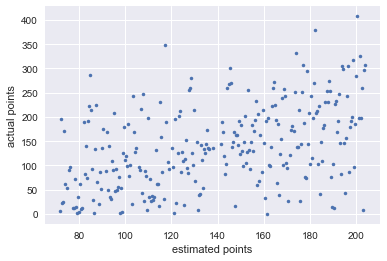

In [204]:
#plot predicted points versus actual points
plt.plot(ridge.predict(X), y, '.')
plt.xlabel('estimated points')
plt.ylabel('actual points')

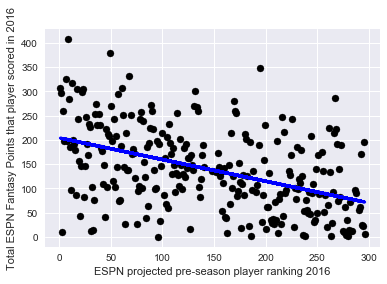

In [205]:
#plot predicted ranking versus points earned
plt.scatter(df.projection, df.points,  color='black')
plt.plot(df.projection, lr.predict(X), color='blue',
         linewidth=3)
plt.xlabel('ESPN projected pre-season player ranking 2016')
plt.ylabel('Total ESPN Fantasy Points that player scored in 2016')

In [206]:
def my_cv_and_r_squared(X,y,i):
    
    pipeline = [
        ('imputer', Imputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(i)),
        ('scale2', MinMaxScaler()),
        ('estimator', RidgeCV())
    ]

    pipeline = Pipeline(pipeline)
    
    adj_r2_train = []
    adj_r2_test = []

    r2_train=[]
    r2_test=[]
    
    
    kf = KFold(n_splits=5, shuffle = True)
    kf.get_n_splits(X)
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        pipeline.fit(X_train, y_train)
        
        y_train_score = pipeline.score(X_train, y_train)
        y_test_score = pipeline.score(X_test, y_test)
        r2_train.append(y_train_score)
        r2_test.append(y_test_score)
        
        adj_r2_train.append(1 - (1-y_train_score)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)) 
        adj_r2_test.append(1 - (1-y_test_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

#    print('R^2 on Training Data', np.mean(r2_train))
#    print('R^2 on Testing Data', np.mean(r2_test))
##    print('Av. Adj R^2 on Training Data', np.mean(adj_r2_train))
 #   print('Av. Adj R^2 on Testing Data', np.mean(adj_r2_test))
        
    return np.mean(adj_r2_test), np.mean(adj_r2_train)

In [207]:
#get ridge with CV and average out results so that adjusted R^2 on test data stabilizes
X = df.iloc[:, [1,2]]
del X['points']
y = df['points']

r2_test = []
r2_train = []
for i in range(100):
    test, train = my_cv_and_r_squared(X,y, 1)
    r2_test.append(test)
    r2_train.append(train)
    
print('adj r2 train =', np.mean(r2_train))
print('adj r2 test =', np.mean(r2_test))

adj r2 train = 0.201359552717
adj r2 test = 0.159306764587


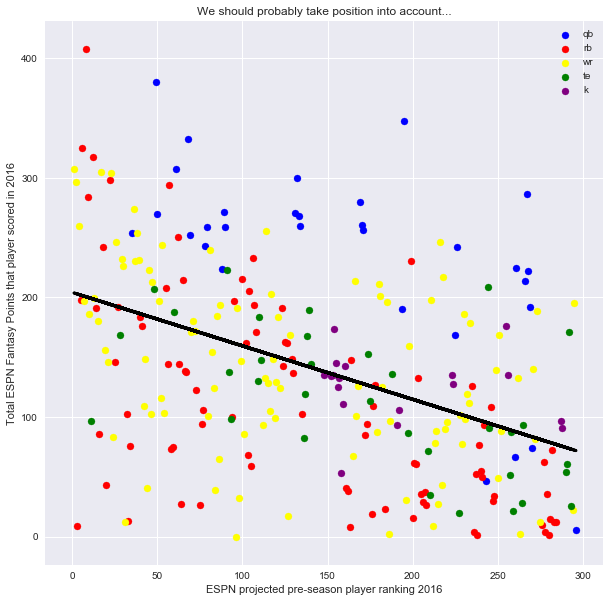

In [208]:
#Let's break things down by position:
quarterbacks = df[df['position'] == 'QB']
runningbacks = df[df['position'] == 'RB']
receivers = df[df['position'] == 'WR']
tightends = df[df['position'] == 'TE']
kickers = df[df['position'] == 'K']

fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(quarterbacks.projection, quarterbacks.points,  color='blue', label='qb')
ax.scatter(runningbacks.projection, runningbacks.points,  color='red', label='rb')
ax.scatter(receivers.projection, receivers.points,  color='yellow', label = 'wr')
ax.scatter(tightends.projection, tightends.points,  color='green', label = 'te')
ax.scatter(kickers.projection, kickers.points,  color='purple', label = 'k')
ax.plot(X, lr.predict(X), color='black', linewidth=3)
ax.set_xlabel('ESPN projected pre-season player ranking 2016')
ax.set_ylabel('Total ESPN Fantasy Points that player scored in 2016')
ax.set_title('We should probably take position into account...')
ax.legend(loc='best')

In [158]:
df.head()

,position,projection,points,Team,No,Exp,Height,Weight,Age,School,School_Championships,Num_of_players_from_school,Depth
Matt Ryan,QB,195,347.5,ATL,2,9,"6'4""",217,31,Boston College,0,1,1
David Johnson,RB,8,407.8,ARZ,31,2,"6'1""",224,24,Northern Iowa,0,1,1
Dak Prescott,QB,267,286.9,DAL,4,0,"6'2""",238,22,Mississippi State,0,1,3
Aaron Rodgers,QB,49,380.0,GB,12,12,"6'2""",225,32,California,0,7,1
Drew Brees,QB,68,332.3,NO,9,16,"6'0""",209,37,Purdue,0,1,1


In [229]:
#only consider columns of interest:
position_matrix = df.iloc[:, [0,1,2]]
position_matrix.head()


,position,projection,points
Travis Benjamin,WR,113,132.4
Amari Cooper,WR,29,232.3
DeVante Parker,WR,82,154.4
Nick Novak,K,256,135.0
Giovani Bernard,RB,73,122.3


In [230]:
positions = patsy.dmatrix('position',data=position_matrix,return_type='dataframe')
position_matrix.drop(['position'], axis=1, inplace=True)
position_matrix = position_matrix.join(positions)
position_matrix.head()

/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,projection,points,Intercept,position[T.QB],position[T.RB],position[T.TE],position[T.WR]
Travis Benjamin,113,132.4,1.0,0.0,0.0,0.0,1.0
Amari Cooper,29,232.3,1.0,0.0,0.0,0.0,1.0
DeVante Parker,82,154.4,1.0,0.0,0.0,0.0,1.0
Nick Novak,256,135.0,1.0,0.0,0.0,0.0,0.0
Giovani Bernard,73,122.3,1.0,0.0,1.0,0.0,0.0


In [211]:
#let's do Ridge CV with cross-val

X = position_matrix[:]
y = X.pop('points')

r2_test = []
r2_train = []
for i in range(100):
    test, train = my_cv_and_r_squared(X,y,1)
    r2_test.append(test)
    r2_train.append(train)

print('adj r2 train =', np.mean(r2_train))
print('adj r2 test =', np.mean(r2_test))


adj r2 train = 0.394034676012
adj r2 test = 0.283733193447


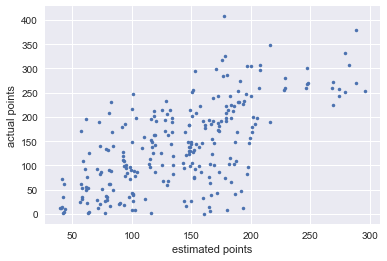

In [31]:
#plot estimated versus actual points

#fit entire data set using ridgeCV
ridge = RidgeCV()
ridge.fit(X, y)

plt.plot(ridge.predict(X), y, '.')
plt.xlabel('estimated points')
plt.ylabel('actual points')

In [32]:
# now let's add age to our list of considerations:
age_matrix = pd.concat([position_matrix, df['Age']], axis=1)
age_matrix.head()

,projection,points,Intercept,position[T.RB],position[T.TE],position[T.WR],Age
Lance Dunbar,207,37.3,1.0,1.0,0.0,0.0,26
Javorius Allen,163,7.9,1.0,1.0,0.0,0.0,24
Frank Gore,65,214.2,1.0,1.0,0.0,0.0,33
Kendall Wright,219,90.1,1.0,0.0,0.0,1.0,26
Alex Smith,261,224.8,1.0,0.0,0.0,0.0,32


In [33]:
#the correlation for age isnt so high though:
age_matrix.corr()['points'].sort_values(ascending = False)

points            1.000000
Age               0.171405
position[T.WR]    0.027869
position[T.TE]   -0.112101
position[T.RB]   -0.218641
projection       -0.455653
Intercept              NaN
Name: points, dtype: float64

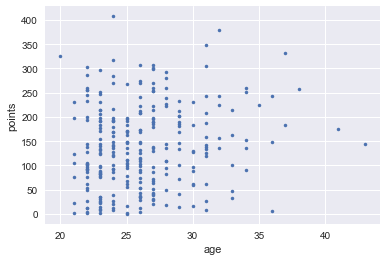

In [40]:
#in addition, the age distribution is blobular:
plt.plot(age_matrix['Age'],age_matrix['points'], '.')
plt.xlabel('age')
plt.ylabel('points')

In [34]:
#let's do Ridge CV with cross-val

X = age_matrix[:]
del X['points']
y = age_matrix['points']

r2_test = []
r2_train = []
for i in range(100):
    test, train = my_cv_and_r_squared(X,y, 1)
    r2_test.append(test)
    r2_train.append(train)
    
print('adj r2 train =', np.mean(r2_train))
print('adj r2 test =', np.mean(r2_test))

adj r2 train = 0.400399716379
adj r2 test = 0.285264680502


In [39]:
#Let's see if Team affects things:
team_matrix = pd.concat([position_matrix, df['Team']], axis=1)
del team_matrix['Intercept']
team_matrix.head()

,projection,points,position[T.RB],position[T.TE],position[T.WR],Team
Lance Dunbar,207,37.3,1.0,0.0,0.0,DAL
Javorius Allen,163,7.9,1.0,0.0,0.0,BAL
Frank Gore,65,214.2,1.0,0.0,0.0,IND
Kendall Wright,219,90.1,0.0,0.0,1.0,TEN
Alex Smith,261,224.8,0.0,0.0,0.0,KC


In [40]:
#gotta break team into categories:
teams = patsy.dmatrix('Team',data=team_matrix,return_type='dataframe')
team_matrix.drop(['Team'], axis=1, inplace=True)
team_matrix = team_matrix.join(teams)
team_matrix.head()

,projection,points,position[T.RB],position[T.TE],position[T.WR],Intercept,Team[T.ATL],Team[T.BAL],Team[T.BUF],Team[T.CAR],...,Team[T.NYJ],Team[T.OAK],Team[T.PHI],Team[T.PIT],Team[T.SD],Team[T.SEA],Team[T.SF],Team[T.TB],Team[T.TEN],Team[T.WSH]
Lance Dunbar,207,37.3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Javorius Allen,163,7.9,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Frank Gore,65,214.2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Kendall Wright,219,90.1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Alex Smith,261,224.8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
#being on NO or ATL helps your chances, being on SF hurts
team_matrix.corr()['points'].sort_values(ascending = False)

points            1.000000
position[T.QB]    0.392798
Team[T.NO]        0.150789
Team[T.ATL]       0.133506
Team[T.OAK]       0.069395
Team[T.GB]        0.059549
Team[T.WSH]       0.037642
position[T.WR]    0.036410
Team[T.TEN]       0.035623
Team[T.IND]       0.034664
Team[T.CIN]       0.032876
Team[T.JAX]       0.023732
Team[T.SD]        0.018903
Team[T.DAL]       0.018753
Team[T.TB]        0.006890
Team[T.CAR]       0.006850
Team[T.BUF]       0.006763
Team[T.SEA]       0.000822
Team[T.DEN]       0.000228
Team[T.DET]      -0.002277
Team[T.PIT]      -0.015905
Team[T.MIA]      -0.018969
Team[T.KC]       -0.019882
Team[T.MIN]      -0.023724
Team[T.NE]       -0.025491
Team[T.BAL]      -0.027453
Team[T.PHI]      -0.028168
Team[T.CLE]      -0.033569
Team[T.NYG]      -0.042589
Team[T.NYJ]      -0.048139
Team[T.HOU]      -0.075293
Team[T.CHI]      -0.089097
Team[T.LA]       -0.092878
position[T.TE]   -0.106538
Team[T.SF]       -0.113889
position[T.RB]   -0.205405
projection       -0.452122
I

In [41]:
#let's do Ridge CV with cross-val

X = team_matrix[:]
del X['points']
y = team_matrix['points']

r2_test = []
r2_train
for i in range(100):
    test, train = my_cv_and_r_squared(X,y, 1)
    r2_test.append(test)
    r2_train.append(train)
    
print('adj r2 train =', np.mean(r2_train))
print('adj r2 test =', np.mean(r2_test))

adj r2 train = 0.381868992654
adj r2 test = -1.64128129482


In [42]:
#Let's see if School Championships affects things:
school_matrix = pd.concat([position_matrix, df['School_Championships']], axis=1)
del school_matrix['Intercept']
school_matrix.head()

,projection,points,position[T.RB],position[T.TE],position[T.WR],School_Championships
Lance Dunbar,207,37.3,1.0,0.0,0.0,0
Javorius Allen,163,7.9,1.0,0.0,0.0,7
Frank Gore,65,214.2,1.0,0.0,0.0,5
Kendall Wright,219,90.1,0.0,0.0,1.0,0
Alex Smith,261,224.8,0.0,0.0,0.0,0


In [43]:
#let's do Ridge CV with cross-val

X = school_matrix[:]
del X['points']
y = school_matrix['points']

r2_test = []
r2_train = []
for i in range(100):
    test, train = my_cv_and_r_squared(X,y, 1)
    r2_test.append(test)
    r2_train.append(train)
    
print('adj r2 train =', np.mean(r2_train))
print('adj r2 test =', np.mean(r2_test))

adj r2 train = 0.403209428926
adj r2 test = 0.297489416542


In [50]:
#Let's see if most NFL attended schools affects things:
school_matrix2 = pd.concat([position_matrix, df['Num_of_players_from_school']], axis=1)
del school_matrix2['Intercept']
school_matrix2.head()

,projection,points,position[T.QB],position[T.RB],position[T.TE],position[T.WR],Num_of_players_from_school
C.J. Prosise,202,61.0,0.0,1.0,0.0,0.0,7
Sammy Watkins,24,83.0,0.0,0.0,0.0,1.0,7
Derek Carr,133,268.5,1.0,0.0,0.0,0.0,3
Fitzgerald Toussaint,283,12.1,0.0,1.0,0.0,0.0,3
Giovani Bernard,73,122.3,0.0,1.0,0.0,0.0,3


In [125]:
#let's do Ridge CV with cross-val

X = school_matrix2[:]
del X['points']
y = school_matrix2['points']

r2_test = []
r2_train
for i in range(100):
    test, train = my_cv_and_r_squared(X,y, 1)
    r2_test.append(test)
    r2_train.append(train)
    
print('adj r2 train =', np.mean(r2_train))
print('adj r2 test =', np.mean(r2_test))

adj r2 train = 0.359471578347
adj r2 test = 0.282334484345


In [44]:
#let's investigate depth
depth = pd.concat([position_matrix, df['Depth']], axis=1)
depth.head()

,projection,points,Intercept,position[T.RB],position[T.TE],position[T.WR],Depth
Lance Dunbar,207,37.3,1.0,1.0,0.0,0.0,4
Javorius Allen,163,7.9,1.0,1.0,0.0,0.0,2
Frank Gore,65,214.2,1.0,1.0,0.0,0.0,1
Kendall Wright,219,90.1,1.0,0.0,0.0,1.0,1
Alex Smith,261,224.8,1.0,0.0,0.0,0.0,1


In [45]:
#let's do Ridge CV with cross-val

X = depth[:]
del X['points']
y = depth['points']

r2_test = []
r2_train = []
for i in range(100):
    test, train = my_cv_and_r_squared(X,y, 1)
    r2_test.append(test)
    r2_train.append(train)
    
print('adj r2 train =', np.mean(r2_train))
print('adj r2 test =', np.mean(r2_test))

adj r2 train = 0.399530847056
adj r2 test = 0.281845551307


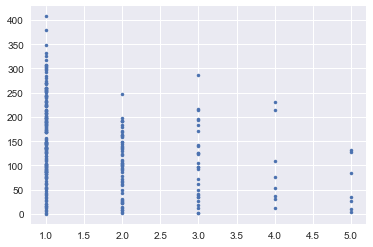

In [54]:
#Checking shapes:
#sns.pairplot(depth) takes too long with this many variables
plt.plot(depth['Depth'], depth['points'],'.')

/Users/shareshianl/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


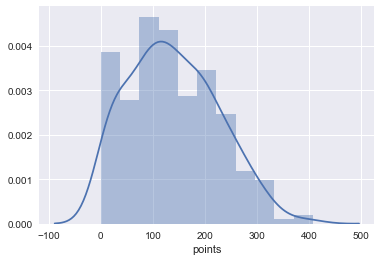

In [55]:
#are my y values normally distributed?
sns.distplot(df['points'])

/Users/shareshianl/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


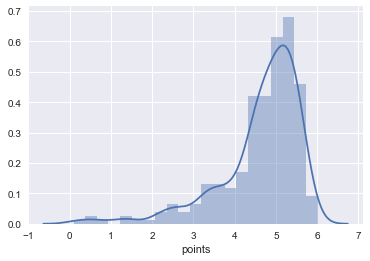

In [56]:
#does logging them make it better? no

nonzero_values = df[df['points'] != 0]['points']
sns.distplot(np.log(nonzero_values))


In [57]:
#This function tests the null hypothesis that a sample comes from a normal distribution. 
#It is based on D’Agostino and Pearson’s [R246], [R247] test that combines skew and kurtosis 
#to produce an omnibus test of normality.

print(normaltest(df['points'])) 

NormaltestResult(statistic=9.3182465096389606, pvalue=0.0094747657164112858)


In [46]:
#let's see how last years' points affect things
points2015 = pd.concat([position_matrix, df['2015_points']], axis=1)
points2015['2015_points'] = points2015['2015_points'].astype(int)
points2015.head()

,projection,points,Intercept,position[T.RB],position[T.TE],position[T.WR],2015_points
Lance Dunbar,207,37.3,1.0,1.0,0.0,0.0,28
Javorius Allen,163,7.9,1.0,1.0,0.0,0.0,101
Frank Gore,65,214.2,1.0,1.0,0.0,0.0,159
Kendall Wright,219,90.1,1.0,0.0,0.0,1.0,61
Alex Smith,261,224.8,1.0,0.0,0.0,0.0,0


In [53]:
points2015.sort_values(by='2015_points',ascending= False)[0:15]

,projection,points,Intercept,position[T.RB],position[T.TE],position[T.WR],2015_points
Cam Newton,35,254.3,1.0,0.0,0.0,0.0,391
Tom Brady,79,258.6,1.0,0.0,0.0,0.0,344
Russell Wilson,50,270.1,1.0,0.0,0.0,0.0,342
Blake Bortles,89,271.1,1.0,0.0,0.0,0.0,324
Carson Palmer,78,243.1,1.0,0.0,0.0,0.0,309
Drew Brees,68,332.3,1.0,0.0,0.0,0.0,306
Aaron Rodgers,49,380.0,1.0,0.0,0.0,0.0,305
Kirk Cousins,132,300.3,1.0,0.0,0.0,0.0,295
Matthew Stafford,169,279.8,1.0,0.0,0.0,0.0,292
Eli Manning,88,224.2,1.0,0.0,0.0,0.0,287


In [47]:
#calculate r^2
X = points2015[:]
del X['points']
y = points2015['points']

r2_test = []
r2_train = []
for i in range(100):
    test, train = my_cv_and_r_squared(X,y, 1)
    r2_test.append(test)
    r2_train.append(train)
    
print('adj r2 train =', np.mean(r2_train))
print('adj r2 test =', np.mean(r2_test))

adj r2 train = 0.400032691275
adj r2 test = 0.27010378438


In [48]:
#how do i do without ESPN? 
#points 2015 doesnt include kickers so let's reduce our data set to all positive values
points2015 = points2015[points2015['2015_points']>0]

In [54]:
lauren_matrix = points2015.iloc[:, [1,2,3,4,5,6,7]]
lauren_matrix.sort_values(by='2015_points',ascending= False)[0:15]

,points,Intercept,position[T.RB],position[T.TE],position[T.WR],2015_points
Cam Newton,254.3,1.0,0.0,0.0,0.0,391
Tom Brady,258.6,1.0,0.0,0.0,0.0,344
Russell Wilson,270.1,1.0,0.0,0.0,0.0,342
Blake Bortles,271.1,1.0,0.0,0.0,0.0,324
Carson Palmer,243.1,1.0,0.0,0.0,0.0,309
Drew Brees,332.3,1.0,0.0,0.0,0.0,306
Aaron Rodgers,380.0,1.0,0.0,0.0,0.0,305
Kirk Cousins,300.3,1.0,0.0,0.0,0.0,295
Matthew Stafford,279.8,1.0,0.0,0.0,0.0,292
Eli Manning,224.2,1.0,0.0,0.0,0.0,287


In [55]:
#how do i do without espn?
X = lauren_matrix[:]
del X['points']
y = lauren_matrix['points']

r2_test = []
r2_train = []
for i in range(100):
    test, train = my_cv_and_r_squared(X,y, 1)
    r2_test.append(test)
    r2_train.append(train)
    
print('adj r2 train =', np.mean(r2_train))
print('adj r2 test =', np.mean(r2_test))

adj r2 train = 0.344123001683
adj r2 test = 0.209017915515


### Since we know that the position matrix is the best, let's use this feature matrix and the whole data set to predict new players's points. First we need to get this year's ESPN rankings:

In [212]:
# ONE ESPN'S TOP 300 RANKINGS ARE AVAILABLE, PUT THEM HERE:
url6 = 'http://www.espn.com/fantasy/football/story/_/id/16287927/2016-fantasy-football-rankings-top-300'
response6 = requests.get(url6)
page6 = response6.text
soup6 = BeautifulSoup(page6, "lxml")

In [224]:
espn = pd.read_html(url6)[1]


In [225]:
#get rid of defense
espn = espn[espn['Pos'] != 'DST']

In [226]:
for i in espn.index.values:
    espn = espn.set_value(i, 'Rank, Player', re.findall('([A-Z].+)', espn['Rank, Player'][i])[0])

In [227]:
espn['espn_projection'] = espn.index
del espn['Team']
del espn['Bye']
del espn['Pos Rk']
espn.head()

,"Rank, Player",Pos,espn_projection
0,Antonio Brown,WR,0
1,Odell Beckham Jr.,WR,1
2,Adrian Peterson,RB,2
3,Julio Jones,WR,3
4,Todd Gurley,RB,4


In [228]:
new_positions = patsy.dmatrix('Pos',data=espn,return_type='dataframe')
espn.drop(['Pos'], axis=1, inplace=True)
espn = espn.join(new_positions)
espn = espn.sample(frac=1)
espn = espn.set_index('Rank, Player')
espn.head()

,espn_projection,Intercept,Pos[T.QB],Pos[T.RB],Pos[T.TE],Pos[T.WR]
"Rank, Player",,,,,,
Andre Johnson,273,1.0,0.0,0.0,0.0,1.0
Jaelen Strong,214,1.0,0.0,0.0,0.0,1.0
Paul Perkins,238,1.0,0.0,1.0,0.0,0.0
Doug Baldwin,37,1.0,0.0,0.0,0.0,1.0
Quinton Patton,228,1.0,0.0,0.0,0.0,1.0


In [231]:
#PREDICT:

X = position_matrix[:]
y = X.pop('points')

pipeline = [
        ('imputer', Imputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(1)),
        ('scale2', MinMaxScaler()),
        ('estimator', RidgeCV())
    ]

pipeline = Pipeline(pipeline)
pipeline.fit(X, y)
player_point_predictions = pipeline.predict(espn)

In [248]:
my_predictions = pd.DataFrame(espn.index.values,player_point_predictions, columns = ['player']  )
my_predictions.reset_index(inplace = True)
my_predictions.rename(index=str, columns={"index": "predicted_points"}, inplace = True)

In [251]:
my_predictions.sort_values(by='predicted_points',ascending= False)[0:10]

,predicted_points,player
164,290.442549,Cam Newton
20,283.887008,Aaron Rodgers
91,283.418755,Russell Wilson
120,278.267973,Andrew Luck
270,274.990203,Drew Brees
195,274.521950,Ben Roethlisberger
222,270.307674,Carson Palmer
169,269.839421,Tom Brady
211,265.625145,Eli Manning
172,265.156892,Blake Bortles


In [181]:
pipeline.fit(X, y)